# Test a Perceptual Phenomenon - Stroop Test

## Introduction

> This is an analysis on the Stroop Phenomenon to answer specific questions. Information about the Stroop Phenomenon is detailed below in the Background Information section. The intructions and original questions to be answered can be seen [Here](https://github.com/TrikerDev/Test-a-Perceptual-Phenomenon---Stroop-Test/blob/master/README.md). The full work and all files for this project can be seen in [this Github Repository](https://github.com/TrikerDev/Test-a-Perceptual-Phenomenon---Stroop-Test). The original dataset to be analysed can be seen [Here](https://github.com/TrikerDev/Test-a-Perceptual-Phenomenon---Stroop-Test/blob/master/Test%20a%20Perceptual%20Phenomenon%20-%20Stroop%20Test/stroopdata.csv).

## Background Information

> In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">PURPLE</span>, <span style="color:purple">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Importing Data

In [127]:
# Importing packages to be used
import math
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Stroop Data
df = df = pd.read_csv('stroopdata.csv')

# Showing dataset
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


> There are 24 samples in this dataset, both with Congruent and Incongruent test times. The time is measured in **SECONDS**.

## Analysis

### What is our independent variable? What is our dependent variable?

>* The **Independent Variable** is the congruent or incongruent condition of the word.

>* The **Dependent Variable** is the time in seconds that it takes to finish the test.

### Definitions

>* µi - Population mean of Incongruent Values

>* µc - Population mean of Congruent Values

>* H0 - Null Hypothesis

>* H1 - Alternate Hypothesis

### What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

#### Hypothesis

>* H0 - **Null Hypothesis**: (μi - μc = 0) There **is not** a significant difference in the average test completion time between the congruent and incongruent tests.

>* H1 - **Alternate Hypothesis**: (μi - μc ≠ 0) There **is** a significant difference in the average test completion time between the congruent and incongruent tests. (Personal hypothesis is that the test completion time of the Incongruent Tests will be much longer than the Congruent Tests)

#### Test Type

> The statistical test we will perform is a **Dependent Two-Tailed T-Test**. The reasons for choosing this type of test for this analysis are:

>* We want to compare the means of the two different tests for our hypothesis. No other variables need to be explored to either reject or accept the Null Hypothesis.

>* We are comparing two dependent samples of data. It would be assumed that each row in the dataset is one person, with a result for each test.

>* We dont have information about the population. Just the data of test completion times.

### Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [128]:
# Describing the dataframe. Shows info such as mean, standard deviation, min, max, etc.
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

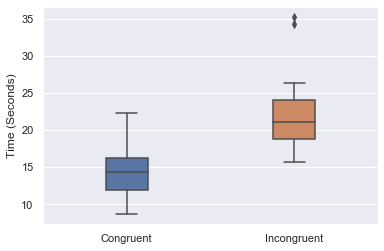

In [129]:
# Creating boxplot to compare congruent and incongruent test times
sns.set_style("darkgrid")
sns.boxplot(data=df[['Congruent', 'Incongruent']], width = 0.25)
plt.ylabel("Time (Seconds)")
plt.show()

> This plot shows that the Incongruent tests have a much longer time to finish than the Congruent tests. The median is much longer on the Incongruent vs Congruent. The minimum of the Incongruent tests is around the 75th percentile on the Congruent tests, indicating that the Incongruent test takes much longer for most individuals. There are also two outliers where the test took much longer, around 35 seconds each, on the Incongruent test.

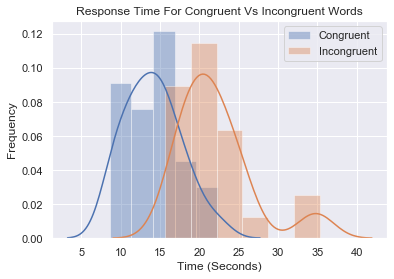

In [130]:
# Creating histogram distplot to compare congruent and incongruent test times
sns.set_style("darkgrid")
sns.distplot(df['Congruent'],label = "Congruent")
sns.distplot(df['Incongruent'],label = "Incongruent")
plt.xlabel("Time (Seconds)")
plt.ylabel("Frequency")
plt.title("Response Time For Congruent Vs Incongruent Words")
plt.legend()
plt.show()

> This plot shows that both variables have very normal distributions, with the exception of the two higher outliers on the Incongruent plot. They are very close to the same distribution, just with Incongruent taking a longer time on average so it is skewed further to the right than the Congruent plot.

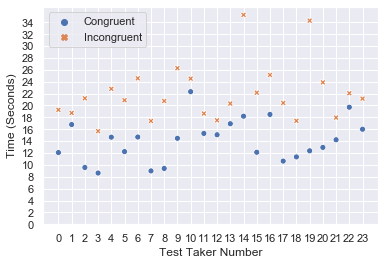

In [131]:
# Creating scatterplot to display time of each testaker on both tests
sns.set(style="darkgrid")
sns.scatterplot(data = df)
plt.xlabel("Test Taker Number")
plt.ylabel("Time (Seconds)")
plt.xticks(np.arange(0, 24, 1))
plt.yticks(np.arange(0, 35, 2))
plt.show()

> This plot is very interesting as it shows each test taker individually with both their test times. This shows that every test taker took a longer time on the Incongruent test vs the Congruent test. Some test takers were very close in their times to complete both tests, and some took significantly longer for the Incongruent test, but it shows that every single user took a longer time to complete the Incongruent test.

### Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

>* Sample size(n) is 24, so Degree of Freedom(df) is 23. (n - 1 = df)
>* 95% Confidence level

In [132]:
# Finding T-Critical value with our df and confidence level
t.ppf(.95,23)

1.7138715277470473

>* T-Critical value is 1.714

In [133]:
# Creating dataframe that is the difference between congruent and incongruent
df['Difference'] = df['Congruent'] - df['Incongruent']

# Finding standard deviation of the difference dataframe
df['Difference'].std()

4.864826910359056

In [134]:
# Finding mean of the difference dataframe
df['Difference'].mean()

-7.964791666666667

>* Standard Deviation of the difference is 4.865
>* Mean of the difference is -7.965

In [135]:
# Finding T-Statistic value using T-Critical and standard deviation value
-7.965/(4.865/math.sqrt(24))

-8.020631367427754

>* T-Statistic value is -8.021

> T-Statistic(-8.021) < T-Critical(1.714)

## Conclusion

> We reject the Null Hypothesis as there is a significant difference between the test completion times of the congruent and incongruent tests. We were also correct in the assumption that the incongruent test would on average take longer than the congruent test. The mean of the difference shows on average that it took around 8 seconds longer for a participant to complete the incongruent test than the congruent test.